In [1]:
from pathlib import Path
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [5]:
# load data with relative path
script_dir = Path.cwd()
data_file = script_dir.parent / "data/processed_data_heidelberg.csv"
data = pd.read_csv(data_file)

# exlude all columns that are not numerical
data = data.select_dtypes(include=[np.number])
print(data.columns)

Index(['matchday_no', 'opponent_table_position', 'away_game', 'overtime',
       'heidelberg_win', 'opponent_points', 'heidelberg_points',
       'opponent_points_1st_quarter', 'heidelberg_points_1st_quarter',
       'opponent_points_2nd_quarter', 'heidelberg_points_2nd_quarter',
       'opponent_points_3rd_quarter', 'heidelberg_points_3rd_quarter',
       'opponent_points_4th_quarter', 'heidelberg_points_4th_quarter',
       'total_amount_fans', 'arena_occupancy', 'field_goals_attempted',
       'field_goals_made', '2_pointer_percentage', '3_pointer_percentage',
       'free_throw_percentage', 'rebounds', 'assists', 'turnovers', 'steals',
       'fouls', 'jaworski_minutes_played', 'jaworski_points',
       'jaworski_assists', 'rest_days'],
      dtype='object')


opponent_points_3rd_quarter     -0.761380
opponent_points_1st_quarter     -0.690831
opponent_points                 -0.527858
opponent_points_2nd_quarter     -0.443616
field_goals_attempted           -0.425168
fouls                           -0.290570
overtime                        -0.206315
arena_occupancy                 -0.203327
turnovers                       -0.198756
away_game                       -0.198563
2_pointer_percentage            -0.160913
heidelberg_points_3rd_quarter   -0.135659
assists                         -0.103160
matchday_no                     -0.041999
opponent_points_4th_quarter      0.075009
rebounds                         0.109513
heidelberg_points                0.126733
total_amount_fans                0.128423
field_goals_made                 0.153180
jaworski_assists                 0.164109
free_throw_percentage            0.276479
rest_days                        0.320368
jaworski_minutes_played          0.345226
heidelberg_points_2nd_quarter    0

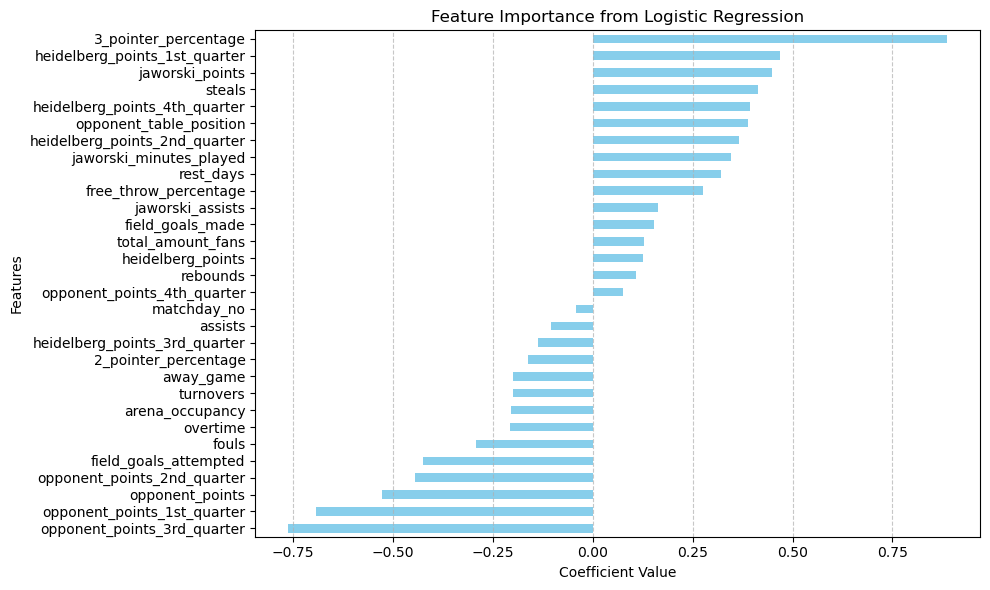

In [6]:
df = data
X = df.drop("heidelberg_win", axis=1)
y = df["heidelberg_win"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Logistic Regression to identify important features
model = LogisticRegression()
model.fit(X_scaled, y)

# Feature importance
importance = pd.Series(model.coef_[0], index=X.columns).sort_values()
print(importance)

plt.figure(figsize=(10, 6))
importance.plot(kind="barh", color="skyblue")
plt.title("Feature Importance from Logistic Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

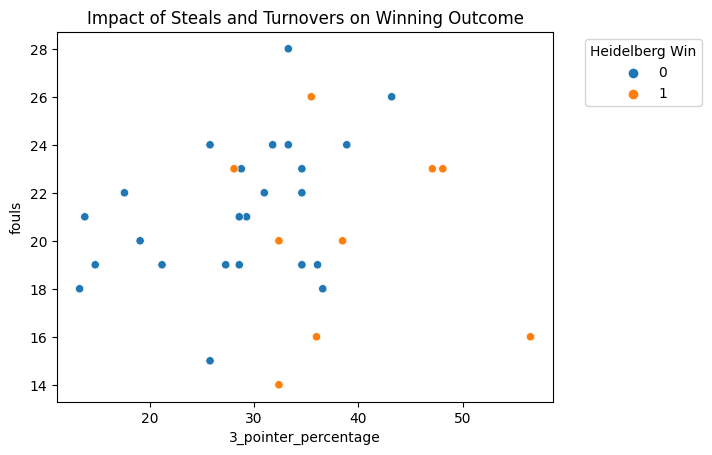

In [10]:
sns.scatterplot(data=data, x="3_pointer_percentage", y="fouls", hue="heidelberg_win")
plt.title("Impact of Steals and Turnovers on Winning Outcome")
plt.legend(title="Heidelberg Win", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Two features negatively correlating with the chance of Heidelberg winning the game

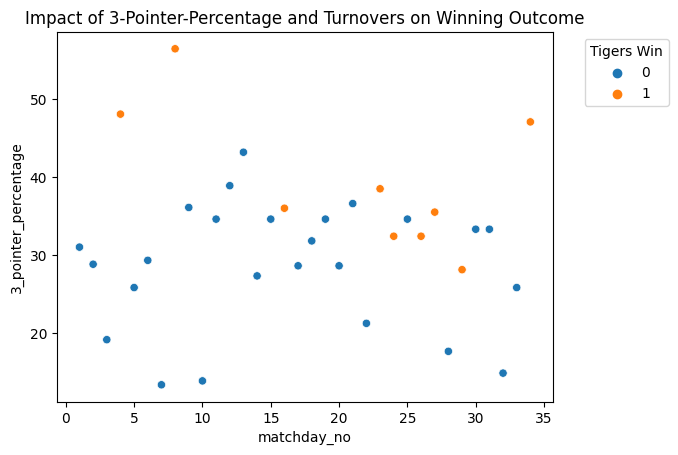

In [7]:
sns.scatterplot(data=data, x="matchday_no", y="3_pointer_percentage", hue="heidelberg_win")
plt.title("Impact of 3-Pointer-Percentage and Turnovers on Winning Outcome")
plt.legend(title="Heidelberg Win", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

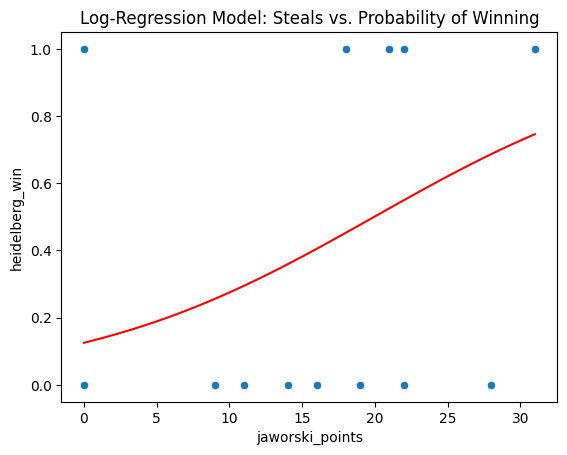

In [12]:
# 1D plot of steals and heidelberg_win
# fit logistic regression model
feature = "jaworski_points"
feature_data_column = data[feature]
model = LogisticRegression()
model.fit(data[[feature]], data["heidelberg_win"])

# create a range for the decision boundary
x_range = np.linspace(feature_data_column.min(), feature_data_column.max(), 100)
x_range_df = pd.DataFrame({feature: x_range})  # Ensure feature names are included

# plot data and decision boundary
sns.scatterplot(data=data, x=feature, y="heidelberg_win")
sns.lineplot(x=x_range, y=model.predict_proba(x_range_df)[:, 1], color="red")
plt.title("Log-Regression Model: Steals vs. Probability of Winning")
plt.show()

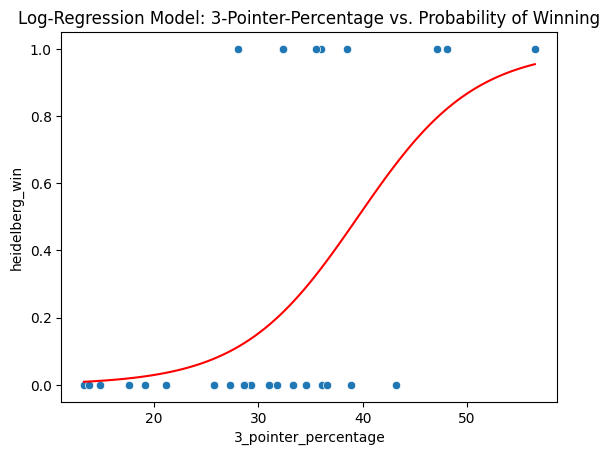

In [9]:
# 1D plot of 3-pointer percentage and heidelberg_win
# fit logistic regression model
feature = "3_pointer_percentage"
feature_data_column = data[feature]
model = LogisticRegression()
model.fit(data[[feature]], data["heidelberg_win"])

# create a range for the decision boundary
x_range = np.linspace(feature_data_column.min(), feature_data_column.max(), 100)
x_range_df = pd.DataFrame({feature: x_range})  # Ensure feature names are included

# plot data and decision boundary
sns.scatterplot(data=data, x=feature, y="heidelberg_win")
sns.lineplot(x=x_range, y=model.predict_proba(x_range_df)[:, 1], color="red")
plt.title("Log-Regression Model: 3-Pointer-Percentage vs. Probability of Winning")
plt.show()